# The vector function $\mathbf{G}$

We begin by importing some stuff and defining our functions:

In [25]:
import numpy as np
from sympy import *
print("Using sympy version", sympy.__version__)
x, y, z, mu, nu = symbols('x y z mu nu')
init_session(quiet=True)

Using sympy version 1.1.2.dev



In [38]:
from sympy.vector import CoordSys3D
N = CoordSys3D('N')

In [45]:
func = 0 * N.i + x ** ((mu + 2) / 2) * y ** (nu / 2) * N.j

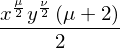

In [47]:
simplify(diff(func.dot(N.j), x) - diff(func.dot(N.i), y))

In [50]:
diff(x**2,x)